# 1. Data Collection

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.DataFrame(pd.read_csv("./dataset/train.csv"))
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 2. Data Cleaning

In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

In [17]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [18]:
drop_columns=['MasVnrType','Alley', 'FireplaceQu','PoolQC', 'Fence','MiscFeature']
repair_col=['LotFrontage','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [19]:
df=df.drop(columns=drop_columns)

In [20]:
df.shape

(1460, 75)

In [21]:
df[repair_col].info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   BsmtQual      1423 non-null   str    
 2   BsmtCond      1423 non-null   str    
 3   BsmtExposure  1422 non-null   str    
 4   BsmtFinType1  1423 non-null   str    
 5   BsmtFinType2  1422 non-null   str    
 6   Electrical    1459 non-null   str    
 7   GarageType    1379 non-null   str    
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   str    
 10  GarageQual    1379 non-null   str    
 11  GarageCond    1379 non-null   str    
dtypes: float64(2), str(10)
memory usage: 180.2 KB


In [22]:
f_col=['LotFrontage','GarageYrBlt']
df[f_col].isna().sum()
df[f_col]=df[f_col].fillna(df[f_col].mean())

In [23]:
str_repair_col=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
for col in str_repair_col:
    df[col] = df[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   LotShape       1460 non-null   str    
 7   LandContour    1460 non-null   str    
 8   Utilities      1460 non-null   str    
 9   LotConfig      1460 non-null   str    
 10  LandSlope      1460 non-null   str    
 11  Neighborhood   1460 non-null   str    
 12  Condition1     1460 non-null   str    
 13  Condition2     1460 non-null   str    
 14  BldgType       1460 non-null   str    
 15  HouseStyle     1460 non-null   str    
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt      1460

#### We Can Remove Outlier But that is too much so that's not recommended.

In [24]:
# surgical_cols = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea', 'GarageArea']

# def surgical_clean(df, columns):
#     df_final = df.copy()
#     for col in columns:
#         Q1 = df_final[col].quantile(0.25)
#         Q3 = df_final[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         # Use a very generous 3.0 multiplier (Extreme Outliers Only)
#         lower_bound = Q1 - 3.0 * IQR
#         upper_bound = Q3 + 3.0 * IQR
        
#         # Only remove rows if they are outliers in THESE specific columns
#         df_final = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
#     return df_final


In [25]:
df.shape

(1460, 75)

In [26]:
def remove_outliers_iqr(df, columns):
    df_final = df.copy()
    for col in columns:
        q1 = df_final[col].quantile(0.25)
        q3 = df_final[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_final = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
    return df_final

# Define features/target before outlier removal
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [27]:
# 1. Select ONLY continuous numerical columns
# (We exclude ID, SalePrice, and any columns with small unique value counts like 0/1/2/3/4)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = [col for col in numeric_cols if X[col].nunique() > 25]

# 2. Apply the master filter to your training data
# We include SalePrice in the temp df to ensure rows are dropped from both X and y
temp_df = pd.concat([X, y], axis=1)
clean_df = remove_outliers_iqr(temp_df, continuous_cols)

# 3. Re-split into X and y
X_final = clean_df.drop('SalePrice', axis=1)
y_final = clean_df['SalePrice']

# 3. Feature Engineering

In [28]:
pd.set_option('display.max_columns', None)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [29]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
str_cols=df.select_dtypes(include=['object']).columns.tolist()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_35284\711608289.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  str_cols=df.select_dtypes(include=['object']).columns.tolist()


In [30]:
for col in str_cols:
    print(col)
    print(df[col].unique())
    print("="*50) 

MSZoning
<ArrowStringArray>
['RL', 'RM', 'C (all)', 'FV', 'RH']
Length: 5, dtype: str
Street
<ArrowStringArray>
['Pave', 'Grvl']
Length: 2, dtype: str
LotShape
<ArrowStringArray>
['Reg', 'IR1', 'IR2', 'IR3']
Length: 4, dtype: str
LandContour
<ArrowStringArray>
['Lvl', 'Bnk', 'Low', 'HLS']
Length: 4, dtype: str
Utilities
<ArrowStringArray>
['AllPub', 'NoSeWa']
Length: 2, dtype: str
LotConfig
<ArrowStringArray>
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Length: 5, dtype: str
LandSlope
<ArrowStringArray>
['Gtl', 'Mod', 'Sev']
Length: 3, dtype: str
Neighborhood
<ArrowStringArray>
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',  'NWAmes',
 'OldTown', 'BrkSide',  'Sawyer', 'NridgHt',   'NAmes', 'SawyerW',  'IDOTRR',
 'MeadowV', 'Edwards',  'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill',
 'Blmngtn',  'BrDale',   'SWISU', 'Blueste']
Length: 25, dtype: str
Condition1
<ArrowStringArray>
['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Length

In [31]:
qual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None': 0}
ordinal_cols = {
    'ExterQual': qual_map,
    'ExterCond': qual_map,
    'BsmtQual': qual_map,
    'BsmtCond': qual_map,
    'HeatingQC': qual_map,
    'KitchenQual': qual_map,
    'GarageQual': qual_map,
    'GarageCond': qual_map,
    'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    'LandContour': {'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0},
    'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
    'CentralAir': {'Y': 1, 'N': 0},
    'Street': {'Pave': 1, 'Grvl': 0},
    'Utilities': {'AllPub': 1, 'NoSeWa': 0}
}

for col, mapping in ordinal_cols.items():
    if col in df.columns:
        df[col] = df[col].fillna('None').map(mapping)

# 2. NOMINAL ENCODING (One-Hot Encoding for features without rank)
# These are categories like Neighborhood or Roof Style where 0, 1, 2... has no meaning.
nominal_cols = [
    'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'GarageType', 
    'SaleType', 'SaleCondition'
]

# This creates new columns (e.g., MSZoning_RL, MSZoning_RM) and drops original ones
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("Encoding complete. New shape:", df.shape)


Encoding complete. New shape: (1460, 189)


In [32]:
df.head(5)

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,3,3,1,2,7,5,2003,2003,196.0,3,2,3,2,1,6,706,Unf,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,2003.0,2,2,548,2,2,2,0,61,0,0,0,0,0,2,2008,208500,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,1,3,3,1,2,6,8,1976,1976,0.0,2,2,3,2,4,5,978,Unf,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,1976.

In [33]:
new_df=df.select_dtypes(include=['int64','float64'])
new_df

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,1,3,3,1,2,7,5,2003,2003,196.0,3,2,3,2,1,6,706,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,2003.0,2,2,548,2,2,2,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,1,3,3,1,2,6,8,1976,1976,0.0,2,2,3,2,4,5,978,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,1976.0,2,2,460,2,2,2,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,1,2,3,1,2,7,5,2001,2002,162.0,3,2,3,2,2,6,486,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,2001.0,2,2,608,2,2,2,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1,2,3,1,2,7,5,1915,1970,0.0,2,2,2,3,1,5,216,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,1998.0,1,3,642,2,2,2,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,1,2,3,1,2,8,5,2000,2000,350.0,3,2,3,2,3,6,655,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,2000.0,2,3,836,2,2,2,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1,3,3,1,2,6,5,1999,2000,0.0,2,2,3,2,1,1,0,0,953,953,4,1,953,694,0,1647,0,0,2,1,3,1,2,7,7,1,1999.0,2,2,460,2,2,2,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,1,3,3,1,2,6,6,1978,1988,119.0,2,2,3,2,1,5,790,163,589,1542,2,1,2073,0,0,2073,1,0,2,0,3,1,2,7,6,2,1978.0,1,2,500,2,2,2,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,1,3,3,1,2,7,9,1941,2006,0.0,4,3,2,3,1,6,275,0,877,1152,4,1,1188,1152,0,2340,0,0,2,0,4,1,3,9,7,2,1941.0,2,1,252,2,2,2,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,1,3,3,1,2,5,6,1950,1996,0.0,2,2,2,2,2,6,49,1029,0,1078,3,1,1078,0,0,1078,1,0,1,0,2,1,3,5,7,0,1950.0,1,1,240,2,2,2,366,0,112,0,0,0,0,4,2010,142125


In [34]:
new_df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LandSlope        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [35]:
new_df=new_df.dropna()
new_df.shape

(1452, 57)

In [36]:
# we have to drop the ID column because they just countinous values
new_df=new_df.drop(columns='Id')

In [37]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# 1. Prepare data
X = new_df.drop('SalePrice', axis=1)
y = new_df['SalePrice']

# 2. Calculate Mutual Information
# discrete_features=False tells it we have continuous numbers
mi_scores = mutual_info_regression(X, y, random_state=42)

# 3. Organize and view
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Top 20 Features based on Mutual Information:")
print(mi_scores.head(20))


Top 20 Features based on Mutual Information:
OverallQual     0.550899
GrLivArea       0.480110
YearBuilt       0.366566
TotalBsmtSF     0.365002
GarageArea      0.359149
GarageCars      0.348198
KitchenQual     0.318652
ExterQual       0.315408
BsmtQual        0.312139
1stFlrSF        0.308887
GarageYrBlt     0.285913
MSSubClass      0.272115
YearRemodAdd    0.250579
FullBath        0.246629
GarageFinish    0.241718
TotRmsAbvGrd    0.224296
2ndFlrSF        0.197599
LotFrontage     0.190302
Fireplaces      0.169610
HeatingQC       0.161685
Name: MI Scores, dtype: float64


In [38]:
print(type(mi_scores))
top20_Feature=mi_scores.head(20).index.tolist()
top20_Feature

<class 'pandas.Series'>


['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'ExterQual',
 'BsmtQual',
 '1stFlrSF',
 'GarageYrBlt',
 'MSSubClass',
 'YearRemodAdd',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 '2ndFlrSF',
 'LotFrontage',
 'Fireplaces',
 'HeatingQC']

# 4. EDA

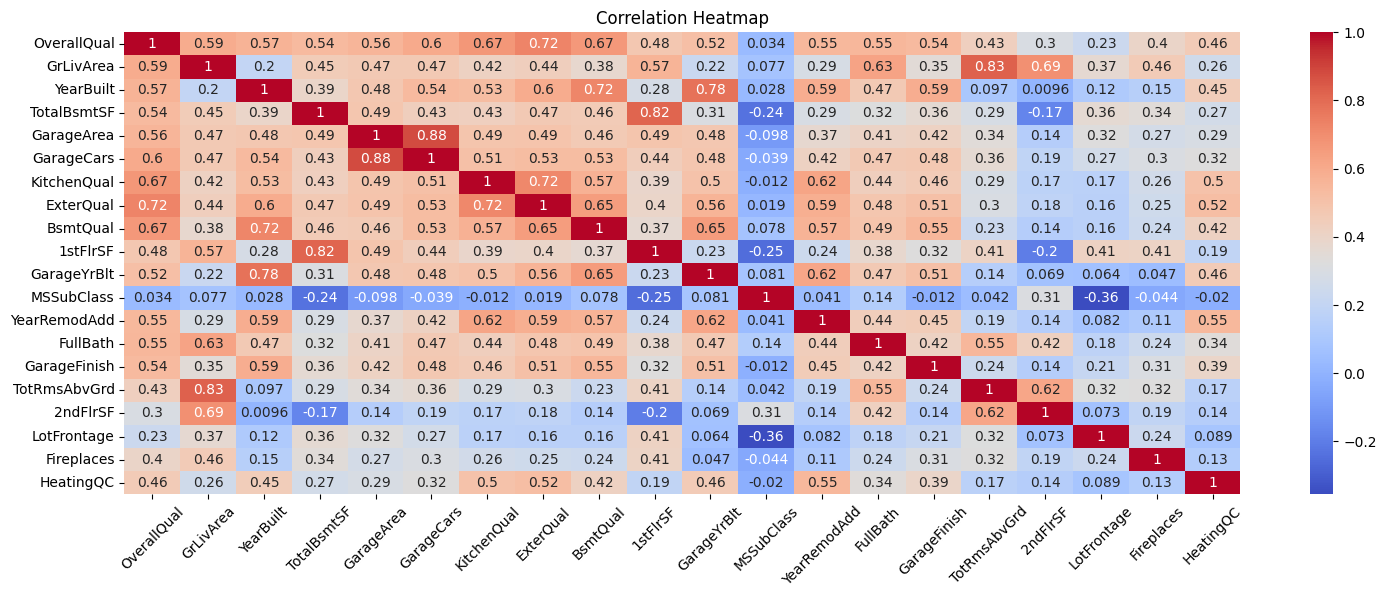

In [39]:
plt.figure(figsize=(18,6))
sns.heatmap(new_df[top20_Feature].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

# 5.Model Selection

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor # You may need to pip install xgboost

# 1. Define the models you want to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.05)
}

# 2. Test each one using Cross-Validation
results = {}
for name, model in models.items():
    # cv=5 means it splits the data 5 times
    # scoring='r2' tells us how much of the price variance we explained (1.0 is perfect)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = cv_scores.mean()

# 3. Print the Proof
print("--- Model Performance (R2 Score) ---")
for name, score in results.items():
    print(f"{name}: {score:.4f}")


--- Model Performance (R2 Score) ---
Linear Regression: 0.8048
Random Forest: 0.8531
XGBoost: 0.8691


# 6.Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# 1. Initialize the model
xgb = XGBRegressor(random_state=42)

# 2. Define the "Grid" of settings to test
# n_estimators: How many trees to build
# max_depth: How complex each tree can be
# learning_rate: How fast the model learns (smaller is usually more accurate but slower)
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# 3. Setup GridSearchCV
# cv=5: Cross-validation (splits data 5 times)
# n_jobs=-1: Uses all your CPU cores to make it faster
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

grid_search.fit(X, y)

# 4. Results
print("Best Settings Found:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# 6. Use the best version for your final predictions
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Settings Found: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.8}
Best R2 Score: 0.8770326852798462


Build Final Model

In [42]:
from xgboost import XGBRegressor

# 1. Initialize the final model with your winning hyperparameters
final_model = XGBRegressor(
    learning_rate=0.01,
    max_depth=7,
    n_estimators=1000,
    subsample=0.8,
    random_state=42,     
    n_jobs=-1           
)

# 2. Train the model 
print("Training final model with optimized settings...")
final_model.fit(X, y)

# 3. Check training score (it should be very high, likely > 0.95)
train_score = final_model.score(X, y)
print(f"Final Model Training R2 Score: {train_score:.4f}")

Training final model with optimized settings...
Final Model Training R2 Score: 0.9971


# 7.Evaulation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Split your training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model on the 80%
final_model.fit(X_train, y_train)

# 3. Predict on the 20%
val_preds = final_model.predict(X_val)

# 4. Calculate Errors
mae = mean_absolute_error(y_val, val_preds)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")


Mean Absolute Error (MAE): $15,895.96
Root Mean Squared Error (RMSE): $23,952.42
